In [72]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import kstest

In [ ]:

# Define the folder containing the CSV files
folder_path = 'C:/Users/apurv/OneDrive/Desktop/QBio/Challenges/UQbio2024_Team5/TrueData'

# Initialize an empty list to store the dataframes
dataframes = []

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        # Extract drug and dosage from the filename
        parts = filename.split('_')
        if parts[0] == 'NoDrug':
            drug = 'NoDrug'
            dosage = '0'
        else:
            drug = parts[0]
            dosage = parts[1]
        
        # Load the CSV file into a dataframe
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        
        # Add the drug and dosage columns
        df['Drug'] = drug
        df['Dosage'] = dosage
        
        # Append the dataframe to the list
        dataframes.append(df)

# Concatenate all dataframes into a single dataframe
merged_df = pd.concat(dataframes, ignore_index=True)

# Save the merged dataframe to a new CSV file
#merged_df.to_csv('C:/Users/apurv/OneDrive/Desktop/QBio/Challenges/UQbio2024_Team5/TrueData/merged_dataset.csv', index=False)

print("Merging complete. The merged dataset has been saved as 'merged_dataset.csv'.")

In [ ]:
# Remove 'nM' from the Dosage column
merged_df['Dosage'] = merged_df['Dosage'].str.replace('nM', '')

# Save the cleaned dataset to a new CSV file
merged_df.to_csv('C:/Users/apurv/OneDrive/Desktop/QBio/Challenges/UQbio2024_Team5/TrueData/cleaned_merged_dataset.csv', index=False)

print("Dosage column cleaned and the dataset has been saved as 'cleaned_merged_dataset.csv'.")

In [2]:
## Read in file
merged_df = pd.read_csv('C:/Users/apurv/OneDrive/Desktop/QBio/Challenges/UQbio2024_Team5/TrueData/cleaned_merged_dataset.csv')

Statistical Analysis and Visualization

Comparison of Cell Vitality across time between dosages for each drug

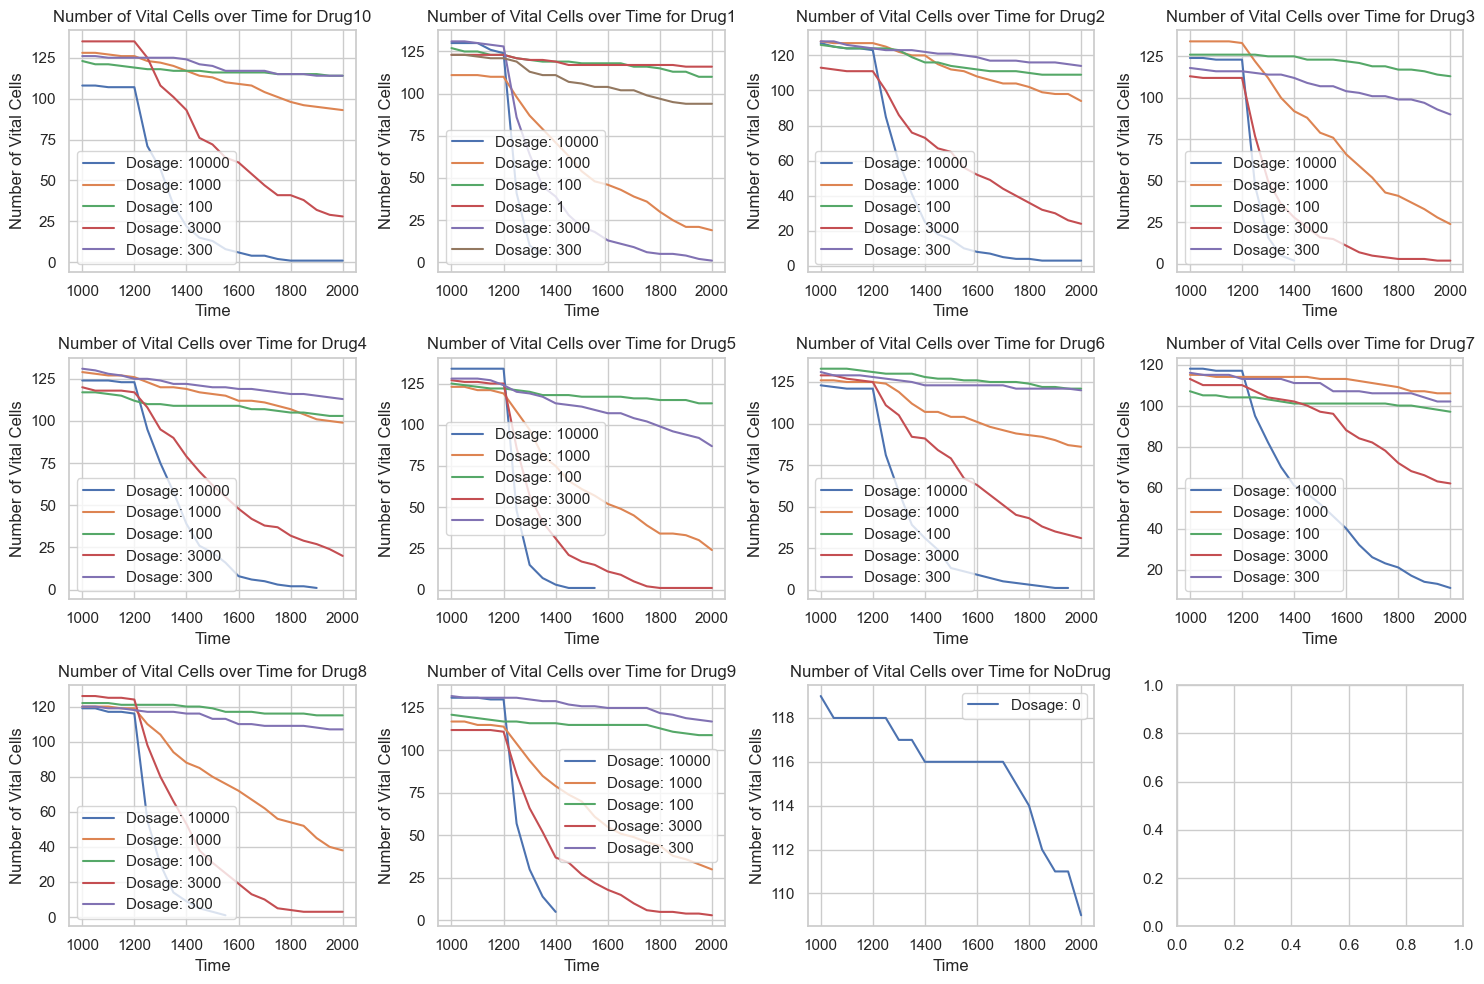

In [70]:
# Filter out rows where is_cell_vital is True
vital_cells_df = merged_df[merged_df['is_cell_vital'] == 1]

# Get unique drugs
unique_drugs = vital_cells_df['Drug'].unique()
# Calculate number of rows and columns for subplots
num_rows = 3
num_cols = 4

# Calculate total number of subplots
num_plots = len(unique_drugs)

# Calculate figure size
fig_width = 15
fig_height = 10

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))

# Loop through each unique drug
for i, drug in enumerate(unique_drugs):
    # Filter data for the current drug
    drug_df = vital_cells_df[vital_cells_df['Drug'] == drug]
    
    # Calculate subplot position
    row = i // num_cols
    col = i % num_cols
    
    # Set current axis
    ax = axes[row, col]
    
    # Loop through each unique dosage for the current drug
    for dosage in drug_df['Dosage'].unique():
        # Filter data for the current dosage
        dosage_df = drug_df[drug_df['Dosage'] == dosage]
        
        # Group by time and sum the number of vital cells
        grouped = dosage_df.groupby('Time')['is_cell_vital'].sum()
        
        # Plot the line
        ax.plot(grouped.index, grouped.values, label=f'Dosage: {dosage}')
    
    # Add labels and legend for each plot
    ax.set_xlabel('Time')
    ax.set_ylabel('Number of Vital Cells')
    ax.set_title(f'Number of Vital Cells over Time for {drug}')
    ax.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [74]:
# Perform Kolmogorov-Smirnov test for normality for each combination of Drug and Dosage
drugs = vital_cells_df['Drug'].unique()
results = {}

for drug in drugs:
    drug_df = merged_df[merged_df['Drug'] == drug]
    dosages = drug_df['Dosage'].unique()
    for dosage in dosages:
        dosage_df = drug_df[drug_df['Dosage'] == dosage]
        # Perform Kolmogorov-Smirnov test
        ks_stat, p_value = stats.kstest(dosage_df['num_rna_nuc'].dropna(), 'norm', args=(dosage_df['num_rna_nuc'].mean(), dosage_df['num_rna_nuc'].std()))
        results[(drug, dosage)] = p_value

# Print summary of results
for (drug, dosage), p_value in results.items():
    if p_value < 0.05:
        print(f'The distribution of num_rna_nuc for {drug} at dosage {dosage} is not normal (p-value = {p_value})')
    else:
        print(f'The distribution of num_rna_nuc for {drug} at dosage {dosage} is normal (p-value = {p_value})')

The distribution of num_rna_nuc for Drug10 at dosage 10000 is not normal (p-value = 0.0)
The distribution of num_rna_nuc for Drug10 at dosage 1000 is not normal (p-value = 6.279824477438081e-136)
The distribution of num_rna_nuc for Drug10 at dosage 100 is not normal (p-value = 1.0626880687120283e-124)
The distribution of num_rna_nuc for Drug10 at dosage 3000 is not normal (p-value = 2.4968507164061474e-245)
The distribution of num_rna_nuc for Drug10 at dosage 300 is not normal (p-value = 1.0067266507687314e-119)
The distribution of num_rna_nuc for Drug1 at dosage 10000 is not normal (p-value = 0.0)
The distribution of num_rna_nuc for Drug1 at dosage 1000 is not normal (p-value = 6.197632019845659e-220)
The distribution of num_rna_nuc for Drug1 at dosage 100 is not normal (p-value = 2.3777004345607738e-127)
The distribution of num_rna_nuc for Drug1 at dosage 1 is not normal (p-value = 1.0040808190277655e-129)
The distribution of num_rna_nuc for Drug1 at dosage 3000 is not normal (p-valu

In [76]:
# Perform Kruskal-Wallis test for each drug
drugs = vital_cells_df['Drug'].unique()

# Exclude 'NoDrug' labeled drug
vital_cells_df = vital_cells_df[vital_cells_df['Drug'] != 'NoDrug']

for drug in drugs:
    drug_df = vital_cells_df[vital_cells_df['Drug'] == drug]
    kruskal_result = stats.kruskal(*(drug_df[drug_df['Dosage'] == dosage]['num_rna_nuc'] for dosage in drug_df['Dosage'].unique()))
    
    print(f'Kruskal-Wallis result for {drug}: p-value = {kruskal_result.pvalue}')
    
    if kruskal_result.pvalue < 0.05:
        print(f'The differences in num_rna_nuc between dosages for {drug} are significant.')
        
        # Post-hoc pairwise comparison
        p_values = []
        dosages = drug_df['Dosage'].unique()
        for i in range(len(dosages)):
            for j in range(i+1, len(dosages)):
                group1 = drug_df[drug_df['Dosage'] == dosages[i]]['num_rna_nuc']
                group2 = drug_df[drug_df['Dosage'] == dosages[j]]['num_rna_nuc']
                _, p = stats.mannwhitneyu(group1, group2)
                p_values.append(p)
        
        
        # Print pairwise comparison results
        k = 0
        for i in range(len(dosages)):
            for j in range(i+1, len(dosages)):
                print(f'Pairwise comparison between {dosages[i]} and {dosages[j]}: corrected p-value = {p_values[k]}')
                k += 1

Kruskal-Wallis result for Drug10: p-value = 0.039865946799083535
The differences in num_rna_nuc between dosages for Drug10 are significant.
Pairwise comparison between 10000 and 1000: corrected p-value = 0.06661023583567911
Pairwise comparison between 10000 and 100: corrected p-value = 0.028467312347720715
Pairwise comparison between 10000 and 3000: corrected p-value = 0.0021076989617896903
Pairwise comparison between 10000 and 300: corrected p-value = 0.031040687421270734
Pairwise comparison between 1000 and 100: corrected p-value = 0.6351247995528444
Pairwise comparison between 1000 and 3000: corrected p-value = 0.06197069133022442
Pairwise comparison between 1000 and 300: corrected p-value = 0.6252032830486718
Pairwise comparison between 100 and 3000: corrected p-value = 0.14195797854332506
Pairwise comparison between 100 and 300: corrected p-value = 0.9832126597641164
Pairwise comparison between 3000 and 300: corrected p-value = 0.15952631169017262
Kruskal-Wallis result for Drug1: 

ValueError: Need at least two groups in stats.kruskal()

Comparison of Cell Vitality across time between drugs for each dosage

mRNA nucleus

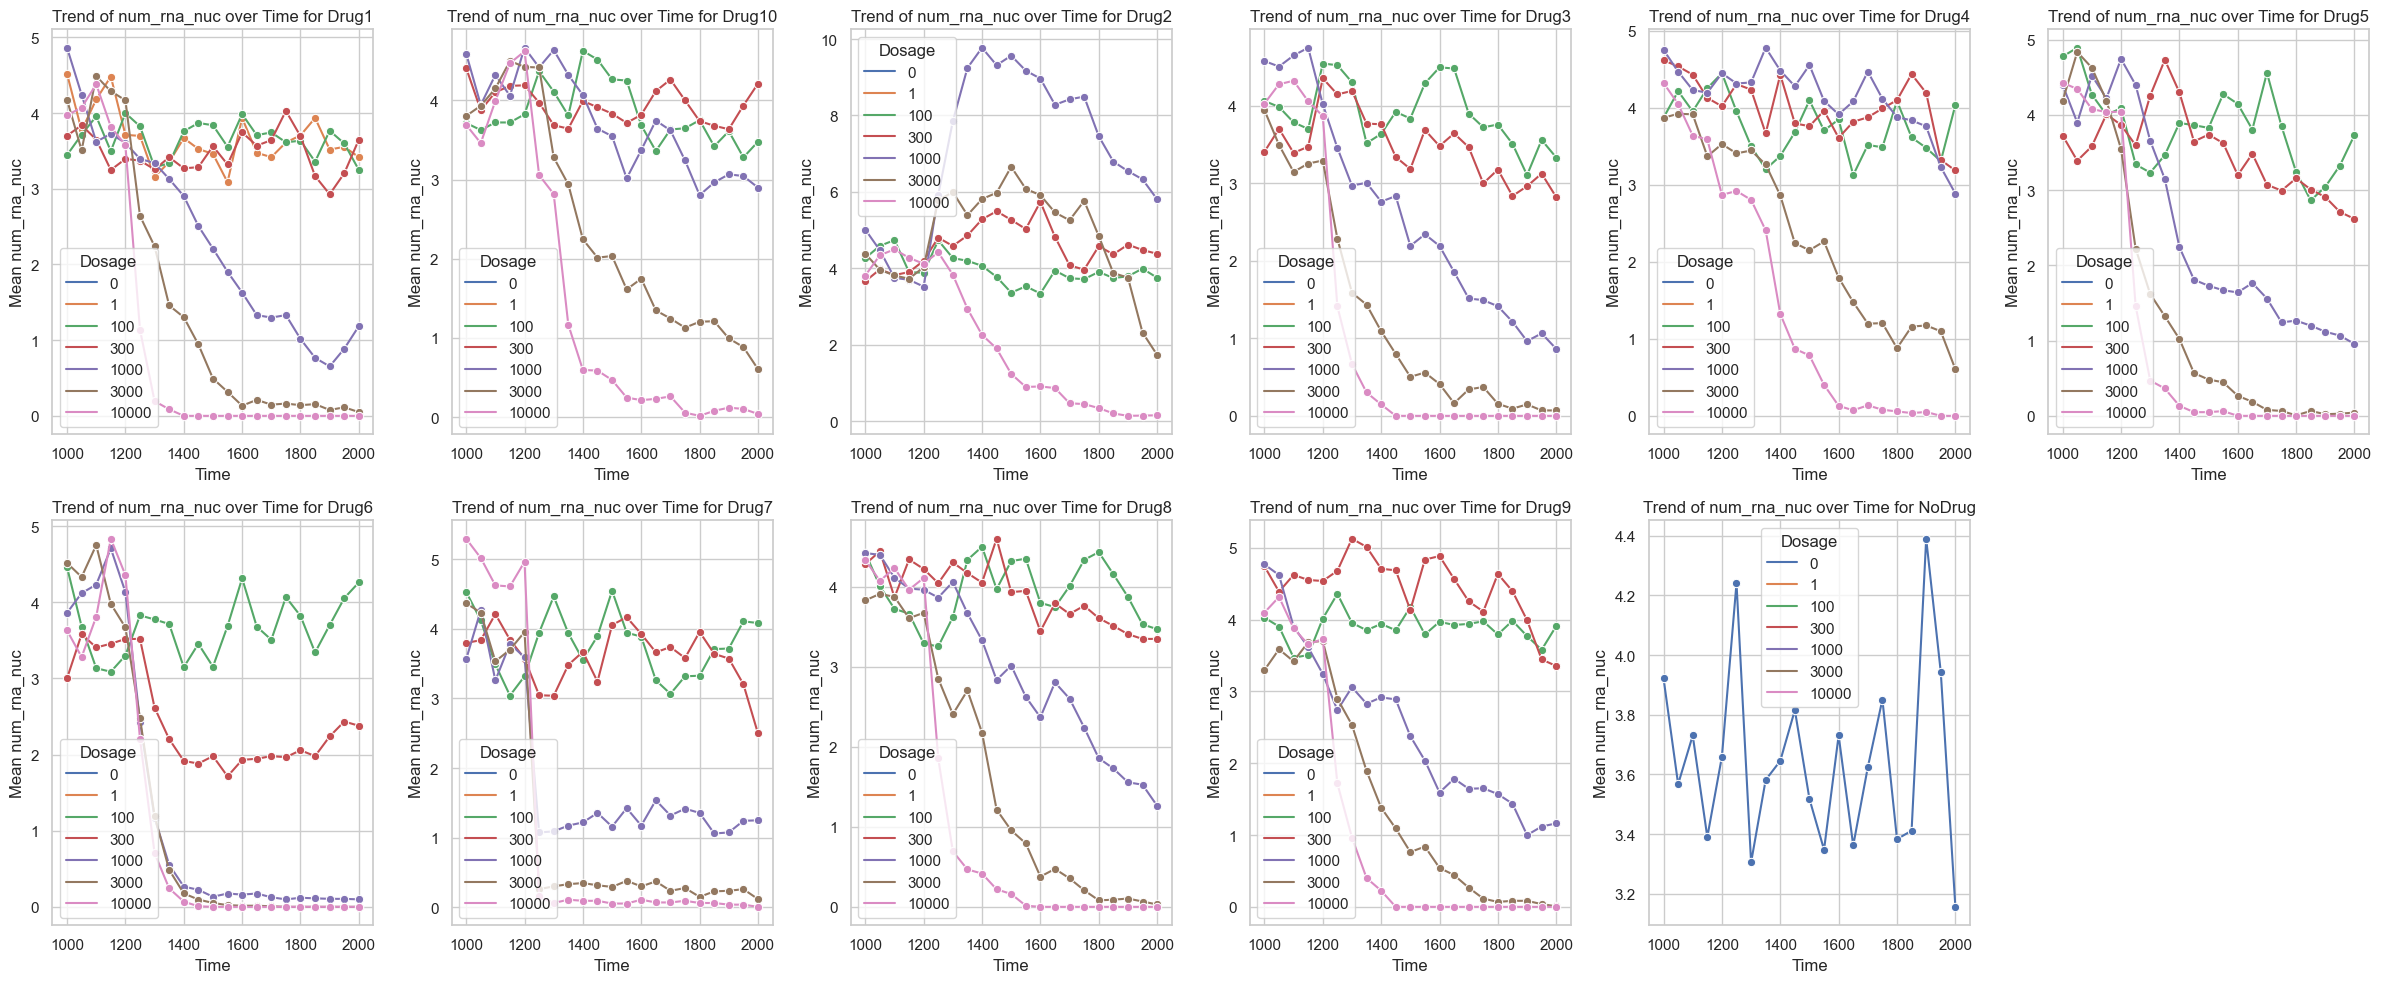

In [29]:
# Group by 'Drug', 'Dosage', and 'Time' to calculate mean num_rna_nuc
grouped_df = merged_df.groupby(['Drug', 'Dosage', 'Time']).mean(numeric_only=True).reset_index()

# Get unique drugs and set up the subplot grid
drugs = grouped_df['Drug'].unique()
num_drugs = len(drugs)
fig, axes = plt.subplots(2, 6, figsize=(24, 10))  # Adjust the grid size as needed

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Create plots
for i, drug in enumerate(drugs):
    ax = axes[i]
    drug_df = grouped_df[grouped_df['Drug'] == drug]
    sns.lineplot(data=drug_df, x='Time', y='num_rna_nuc', hue='Dosage', marker='o', ax=ax)
    ax.set_title(f'Trend of num_rna_nuc over Time for {drug}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Mean num_rna_nuc')
    ax.legend(title='Dosage')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [40]:
# Kolmogorov Smirnoff Test to see if data is distibuted Normally
# Ensure relevant columns are in the correct format
merged_df['num_rna_nuc'] = pd.to_numeric(merged_df['num_rna_nuc'], errors='coerce')
merged_df['Dosage'] = merged_df['Dosage'].astype(str)

# Perform Kolmogorov-Smirnov test for normality for each combination of Drug and Dosage
drugs = merged_df['Drug'].unique()
results = {}

for drug in drugs:
    drug_df = merged_df[merged_df['Drug'] == drug]
    dosages = drug_df['Dosage'].unique()
    for dosage in dosages:
        dosage_df = drug_df[drug_df['Dosage'] == dosage]
        # Perform Kolmogorov-Smirnov test
        ks_stat, p_value = stats.kstest(dosage_df['num_rna_nuc'].dropna(), 'norm', args=(dosage_df['num_rna_nuc'].mean(), dosage_df['num_rna_nuc'].std()))
        results[(drug, dosage)] = p_value

# Print summary of results
for (drug, dosage), p_value in results.items():
    if p_value < 0.05:
        print(f'The distribution of num_rna_nuc for {drug} at dosage {dosage} is not normal (p-value = {p_value})')
    else:
        print(f'The distribution of num_rna_nuc for {drug} at dosage {dosage} is normal (p-value = {p_value})')

The distribution of num_rna_nuc for Drug10 at dosage 10000 is not normal (p-value = 0.0)
The distribution of num_rna_nuc for Drug10 at dosage 1000 is not normal (p-value = 6.279824477438081e-136)
The distribution of num_rna_nuc for Drug10 at dosage 100 is not normal (p-value = 1.0626880687120283e-124)
The distribution of num_rna_nuc for Drug10 at dosage 3000 is not normal (p-value = 2.4968507164061474e-245)
The distribution of num_rna_nuc for Drug10 at dosage 300 is not normal (p-value = 1.0067266507687314e-119)
The distribution of num_rna_nuc for Drug1 at dosage 10000 is not normal (p-value = 0.0)
The distribution of num_rna_nuc for Drug1 at dosage 1000 is not normal (p-value = 6.197632019845659e-220)
The distribution of num_rna_nuc for Drug1 at dosage 100 is not normal (p-value = 2.3777004345607738e-127)
The distribution of num_rna_nuc for Drug1 at dosage 1 is not normal (p-value = 1.0040808190277655e-129)
The distribution of num_rna_nuc for Drug1 at dosage 3000 is not normal (p-valu

In [43]:
# Ensure relevant columns are in the correct format
merged_df['Time'] = pd.to_numeric(merged_df['Time'], errors='coerce')
merged_df['num_rna_nuc'] = pd.to_numeric(merged_df['num_rna_nuc'], errors='coerce')
merged_df['Dosage'] = merged_df['Dosage'].astype(str)

# Exclude 'NoDrug' labeled drug
merged_df_subset = merged_df[merged_df['Drug'] != 'NoDrug']

# Perform Kruskal-Wallis test for each drug
drugs = merged_df_subset['Drug'].unique()

for drug in drugs:
    drug_df = merged_df_subset[merged_df_subset['Drug'] == drug]
    kruskal_result = stats.kruskal(*(drug_df[drug_df['Dosage'] == dosage]['num_rna_nuc'] for dosage in drug_df['Dosage'].unique()))
    
    print(f'Kruskal-Wallis result for {drug}: p-value = {kruskal_result.pvalue}')
    
    if kruskal_result.pvalue < 0.05:
        print(f'The differences in num_rna_nuc between dosages for {drug} are significant.')
        
        # Post-hoc pairwise comparison
        p_values = []
        dosages = drug_df['Dosage'].unique()
        for i in range(len(dosages)):
            for j in range(i+1, len(dosages)):
                group1 = drug_df[drug_df['Dosage'] == dosages[i]]['num_rna_nuc']
                group2 = drug_df[drug_df['Dosage'] == dosages[j]]['num_rna_nuc']
                _, p = stats.mannwhitneyu(group1, group2)
                p_values.append(p)
        
        
        # Print pairwise comparison results
        k = 0
        for i in range(len(dosages)):
            for j in range(i+1, len(dosages)):
                print(f'Pairwise comparison between {dosages[i]} and {dosages[j]}: corrected p-value = {p_values[k]}')
                k += 1

Kruskal-Wallis result for Drug10: p-value = 5.3866739512014256e-291
The differences in num_rna_nuc between dosages for Drug10 are significant.
Pairwise comparison between 10000 and 1000: corrected p-value = 1.0347780473069818e-167
Pairwise comparison between 10000 and 100: corrected p-value = 9.580516867703453e-190
Pairwise comparison between 10000 and 3000: corrected p-value = 1.2129424638683009e-40
Pairwise comparison between 10000 and 300: corrected p-value = 9.184446267738759e-196
Pairwise comparison between 1000 and 100: corrected p-value = 0.06600052783794141
Pairwise comparison between 1000 and 3000: corrected p-value = 1.0947326932370577e-57
Pairwise comparison between 1000 and 300: corrected p-value = 0.01125940523232938
Pairwise comparison between 100 and 3000: corrected p-value = 5.442296476041332e-72
Pairwise comparison between 100 and 300: corrected p-value = 0.47855457548770164
Pairwise comparison between 3000 and 300: corrected p-value = 1.4977548721365878e-76
Kruskal-Wa

In [63]:
merged_df_subset2 = merged_df_subset[~merged_df_subset['Dosage'].isin([0, 1])]


mRNA cytoplasm

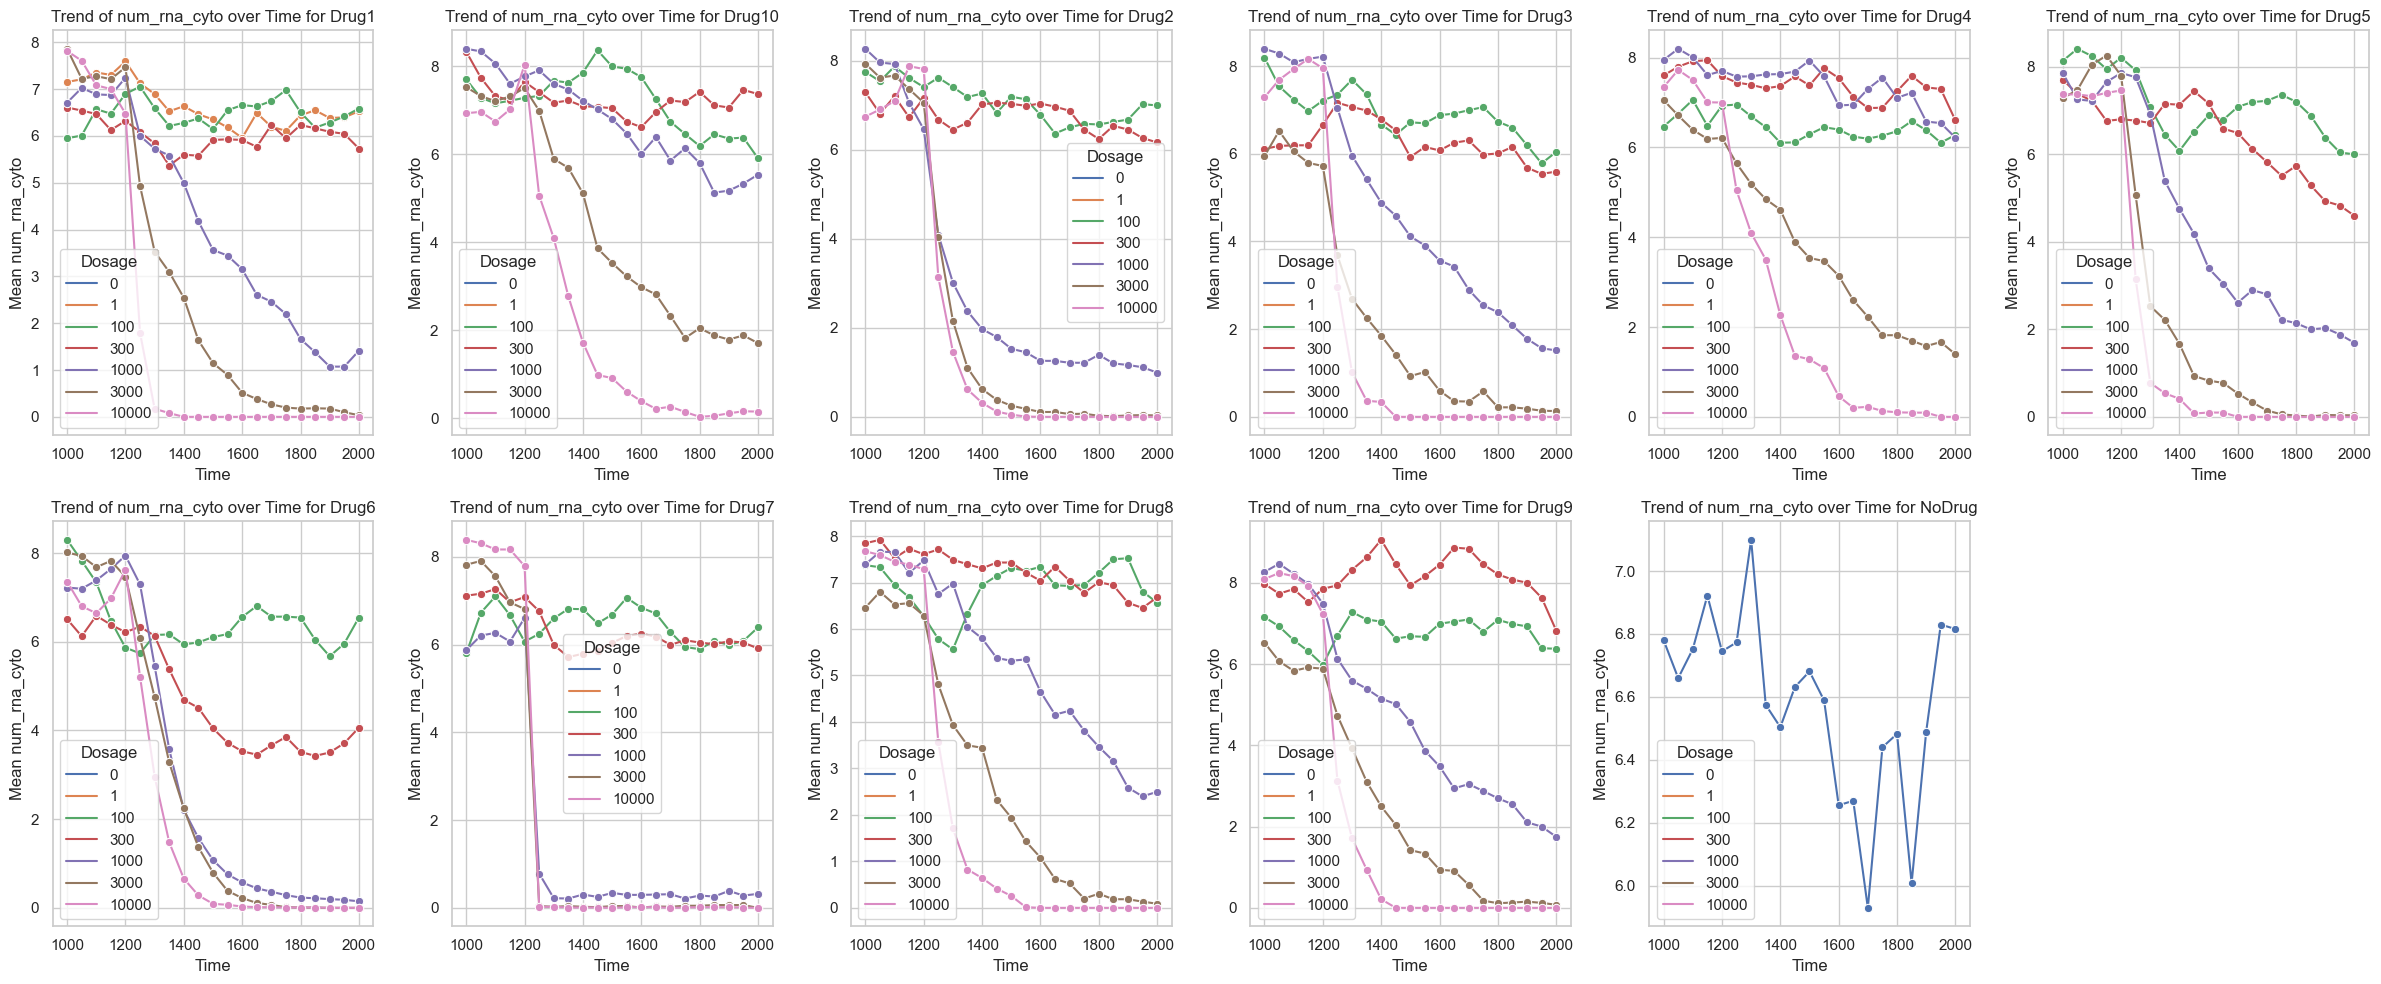

In [31]:
fig, axes = plt.subplots(2, 6, figsize=(24, 10))  # Adjust the grid size as needed

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Create plots
for i, drug in enumerate(drugs):
    ax = axes[i]
    drug_df = grouped_df[grouped_df['Drug'] == drug]
    sns.lineplot(data=drug_df, x='Time', y='num_rna_cyto', hue='Dosage', marker='o', ax=ax)
    ax.set_title(f'Trend of num_rna_cyto over Time for {drug}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Mean num_rna_cyto')
    ax.legend(title='Dosage')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [65]:
# Kolmogorov Smirnoff Test to see if data is distibuted Normally
# Ensure relevant columns are in the correct format
merged_df['num_rna_cyto'] = pd.to_numeric(merged_df['num_rna_cyto'], errors='coerce')
merged_df['Dosage'] = merged_df['Dosage'].astype(str)

# Perform Kolmogorov-Smirnov test for normality for each combination of Drug and Dosage
drugs = merged_df['Drug'].unique()
results = {}

for drug in drugs:
    drug_df = merged_df[merged_df['Drug'] == drug]
    dosages = drug_df['Dosage'].unique()
    for dosage in dosages:
        dosage_df = drug_df[drug_df['Dosage'] == dosage]
        # Perform Kolmogorov-Smirnov test
        ks_stat, p_value = stats.kstest(dosage_df['num_rna_cyto'].dropna(), 'norm', args=(dosage_df['num_rna_cyto'].mean(), dosage_df['num_rna_nuc'].std()))
        results[(drug, dosage)] = p_value

# Print summary of results
for (drug, dosage), p_value in results.items():
    if p_value < 0.05:
        print(f'The distribution of num_rna_cyto for {drug} at dosage {dosage} is not normal (p-value = {p_value})')
    else:
        print(f'The distribution of num_rna_cyto for {drug} at dosage {dosage} is normal (p-value = {p_value})')

The distribution of num_rna_cyto for Drug10 at dosage 10000 is not normal (p-value = 0.0)
The distribution of num_rna_cyto for Drug10 at dosage 1000 is not normal (p-value = 1.1661440135236678e-112)
The distribution of num_rna_cyto for Drug10 at dosage 100 is not normal (p-value = 4.196001188946039e-82)
The distribution of num_rna_cyto for Drug10 at dosage 3000 is not normal (p-value = 7.390731785648456e-307)
The distribution of num_rna_cyto for Drug10 at dosage 300 is not normal (p-value = 1.3238447779494695e-100)
The distribution of num_rna_cyto for Drug1 at dosage 10000 is not normal (p-value = 0.0)
The distribution of num_rna_cyto for Drug1 at dosage 1000 is not normal (p-value = 9.675420580894761e-290)
The distribution of num_rna_cyto for Drug1 at dosage 100 is not normal (p-value = 1.766420693968222e-92)
The distribution of num_rna_cyto for Drug1 at dosage 1 is not normal (p-value = 2.1151811843250156e-94)
The distribution of num_rna_cyto for Drug1 at dosage 3000 is not normal (p

In [68]:
# Ensure relevant columns are in the correct format
merged_df['Time'] = pd.to_numeric(merged_df['Time'], errors='coerce')
merged_df['num_rna_cyto'] = pd.to_numeric(merged_df['num_rna_cyto'], errors='coerce')
merged_df['Dosage'] = merged_df['Dosage'].astype(str)

# Exclude 'NoDrug' labeled drug
merged_df_subset = merged_df[merged_df['Drug'] != 'NoDrug']

# Perform Kruskal-Wallis test for each drug
drugs = merged_df_subset['Drug'].unique()

for drug in drugs:
    drug_df = merged_df_subset[merged_df_subset['Drug'] == drug]
    kruskal_result = stats.kruskal(*(drug_df[drug_df['Dosage'] == dosage]['num_rna_cyto'] for dosage in drug_df['Dosage'].unique()))
    
    print(f'Kruskal-Wallis result for {drug}: p-value = {kruskal_result.pvalue}')
    
    if kruskal_result.pvalue < 0.05:
        print(f'The differences in num_rna_cyto between dosages for {drug} are significant.')
        
        # Post-hoc pairwise comparison
        p_values = []
        dosages = drug_df['Dosage'].unique()
        for i in range(len(dosages)):
            for j in range(i+1, len(dosages)):
                group1 = drug_df[drug_df['Dosage'] == dosages[i]]['num_rna_cyto']
                group2 = drug_df[drug_df['Dosage'] == dosages[j]]['num_rna_cyto']
                _, p = stats.mannwhitneyu(group1, group2)
                p_values.append(p)
        
        
        # Print pairwise comparison results
        k = 0
        for i in range(len(dosages)):
            for j in range(i+1, len(dosages)):
                print(f'Pairwise comparison between {dosages[i]} and {dosages[j]}: corrected p-value = {p_values[k]}')
                k += 1

Kruskal-Wallis result for Drug10: p-value = 0.0
The differences in num_rna_cyto between dosages for Drug10 are significant.
Pairwise comparison between 10000 and 1000: corrected p-value = 1.3778510818011892e-227
Pairwise comparison between 10000 and 100: corrected p-value = 1.2653464296945192e-261
Pairwise comparison between 10000 and 3000: corrected p-value = 2.0542340481416213e-58
Pairwise comparison between 10000 and 300: corrected p-value = 4.951573202216791e-262
Pairwise comparison between 1000 and 100: corrected p-value = 0.0006235010232007181
Pairwise comparison between 1000 and 3000: corrected p-value = 1.5737899223940373e-70
Pairwise comparison between 1000 and 300: corrected p-value = 0.0006961710954728807
Pairwise comparison between 100 and 3000: corrected p-value = 8.931491118702834e-96
Pairwise comparison between 100 and 300: corrected p-value = 0.9557511111186506
Pairwise comparison between 3000 and 300: corrected p-value = 8.152081372814131e-96
Kruskal-Wallis result for 

Protein Concentration

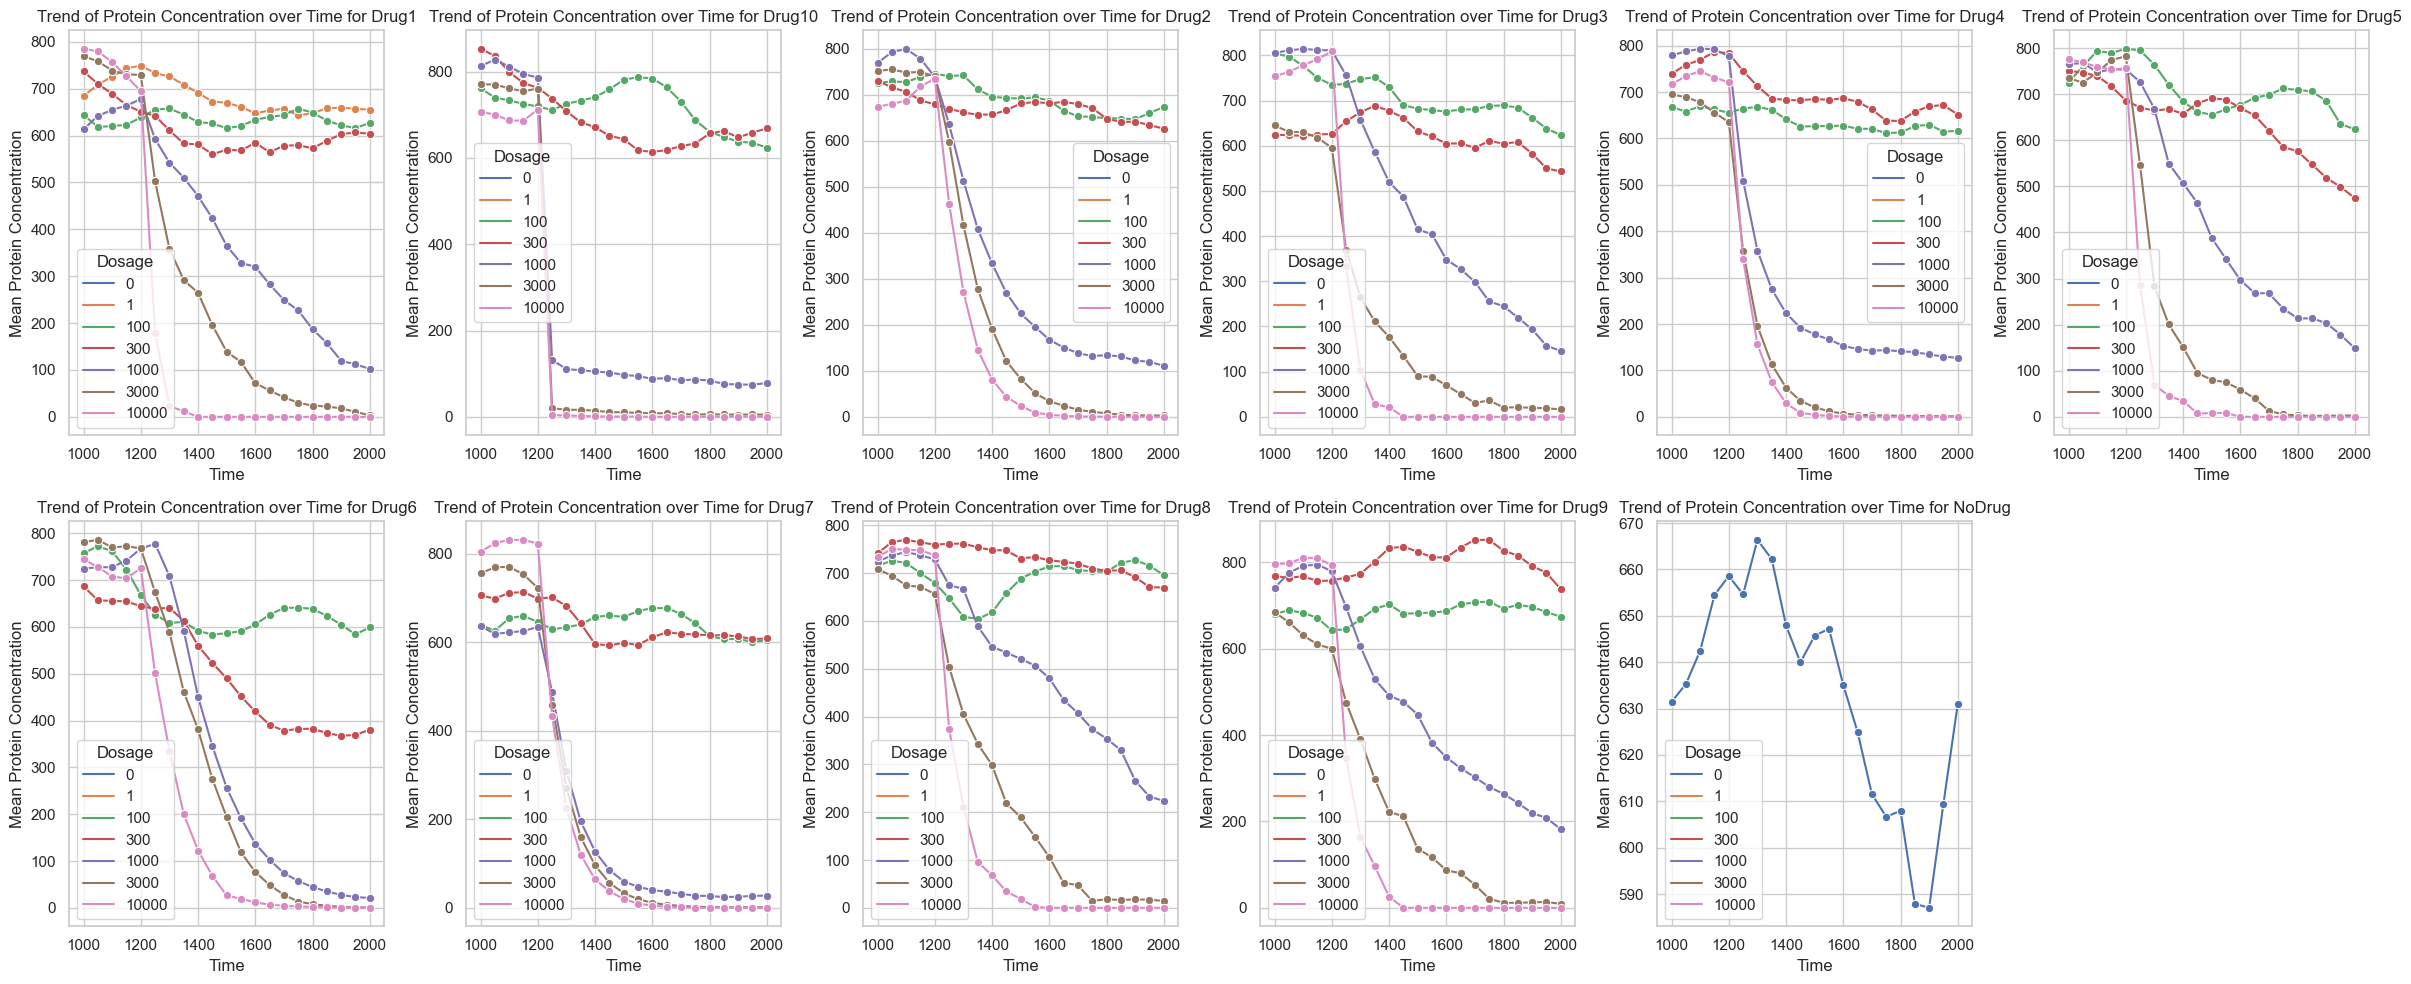

In [34]:
fig, axes = plt.subplots(2, 6, figsize=(24, 10))  # Adjust the grid size as needed

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Create plots
for i, drug in enumerate(drugs):
    ax = axes[i]
    drug_df = grouped_df[grouped_df['Drug'] == drug]
    sns.lineplot(data=drug_df, x='Time', y='Cyto_Intensity_1', hue='Dosage', marker='o', ax=ax)
    ax.set_title(f'Trend of Protein Concentration over Time for {drug}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Mean Protein Concentration')
    ax.legend(title='Dosage')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [66]:
# Kolmogorov Smirnoff Test to see if data is distibuted Normally
# Ensure relevant columns are in the correct format
merged_df['Cyto_Intensity_1'] = pd.to_numeric(merged_df['Cyto_Intensity_1'], errors='coerce')
merged_df['Dosage'] = merged_df['Dosage'].astype(str)

# Perform Kolmogorov-Smirnov test for normality for each combination of Drug and Dosage
drugs = merged_df['Drug'].unique()
results = {}

for drug in drugs:
    drug_df = merged_df[merged_df['Drug'] == drug]
    dosages = drug_df['Dosage'].unique()
    for dosage in dosages:
        dosage_df = drug_df[drug_df['Dosage'] == dosage]
        # Perform Kolmogorov-Smirnov test
        ks_stat, p_value = stats.kstest(dosage_df['Cyto_Intensity_1'].dropna(), 'norm', args=(dosage_df['Cyto_Intensity_1'].mean(), dosage_df['Cyto_Intensity_1'].std()))
        results[(drug, dosage)] = p_value

# Print summary of results
for (drug, dosage), p_value in results.items():
    if p_value < 0.05:
        print(f'The distribution of Protein Concentration for {drug} at dosage {dosage} is not normal (p-value = {p_value})')
    else:
        print(f'The distribution of Protein Concentration for {drug} at dosage {dosage} is normal (p-value = {p_value})')

The distribution of num_rna_cyto for Drug10 at dosage 10000 is not normal (p-value = 0.0)
The distribution of num_rna_cyto for Drug10 at dosage 1000 is not normal (p-value = 2.3919654070248097e-209)
The distribution of num_rna_cyto for Drug10 at dosage 100 is not normal (p-value = 7.150170166327146e-42)
The distribution of num_rna_cyto for Drug10 at dosage 3000 is not normal (p-value = 0.0)
The distribution of num_rna_cyto for Drug10 at dosage 300 is not normal (p-value = 8.666215752679375e-48)
The distribution of num_rna_cyto for Drug1 at dosage 10000 is not normal (p-value = 0.0)
The distribution of num_rna_cyto for Drug1 at dosage 1000 is not normal (p-value = 1.0333422127175043e-152)
The distribution of num_rna_cyto for Drug1 at dosage 100 is not normal (p-value = 2.702214272190971e-46)
The distribution of num_rna_cyto for Drug1 at dosage 1 is not normal (p-value = 3.3033029461815876e-45)
The distribution of num_rna_cyto for Drug1 at dosage 3000 is not normal (p-value = 0.0)
The di

In [69]:
# Ensure relevant columns are in the correct format
merged_df['Time'] = pd.to_numeric(merged_df['Time'], errors='coerce')
merged_df['Cyto_Intensity_1'] = pd.to_numeric(merged_df['Cyto_Intensity_1'], errors='coerce')
merged_df['Dosage'] = merged_df['Dosage'].astype(str)

# Exclude 'NoDrug' labeled drug
merged_df_subset = merged_df[merged_df['Drug'] != 'NoDrug']

# Perform Kruskal-Wallis test for each drug
drugs = merged_df_subset['Drug'].unique()

for drug in drugs:
    drug_df = merged_df_subset[merged_df_subset['Drug'] == drug]
    kruskal_result = stats.kruskal(*(drug_df[drug_df['Dosage'] == dosage]['Cyto_Intensity_1'] for dosage in drug_df['Dosage'].unique()))
    
    print(f'Kruskal-Wallis result for {drug}: p-value = {kruskal_result.pvalue}')
    
    if kruskal_result.pvalue < 0.05:
        print(f'The differences in Cyto_Intensity_1 between dosages for {drug} are significant.')
        
        # Post-hoc pairwise comparison
        p_values = []
        dosages = drug_df['Dosage'].unique()
        for i in range(len(dosages)):
            for j in range(i+1, len(dosages)):
                group1 = drug_df[drug_df['Dosage'] == dosages[i]]['Cyto_Intensity_1']
                group2 = drug_df[drug_df['Dosage'] == dosages[j]]['Cyto_Intensity_1']
                _, p = stats.mannwhitneyu(group1, group2)
                p_values.append(p)
        
        
        # Print pairwise comparison results
        k = 0
        for i in range(len(dosages)):
            for j in range(i+1, len(dosages)):
                print(f'Pairwise comparison between {dosages[i]} and {dosages[j]}: corrected p-value = {p_values[k]}')
                k += 1

Kruskal-Wallis result for Drug10: p-value = 0.0
The differences in Cyto_Intensity_1 between dosages for Drug10 are significant.
Pairwise comparison between 10000 and 1000: corrected p-value = 3.1128750868428275e-209
Pairwise comparison between 10000 and 100: corrected p-value = 0.0
Pairwise comparison between 10000 and 3000: corrected p-value = 1.83056553612561e-49
Pairwise comparison between 10000 and 300: corrected p-value = 0.0
Pairwise comparison between 1000 and 100: corrected p-value = 1.4781235955401595e-224
Pairwise comparison between 1000 and 3000: corrected p-value = 1.4177331505610507e-129
Pairwise comparison between 1000 and 300: corrected p-value = 4.635665474994197e-205
Pairwise comparison between 100 and 3000: corrected p-value = 0.0
Pairwise comparison between 100 and 300: corrected p-value = 0.08663846396772529
Pairwise comparison between 3000 and 300: corrected p-value = 0.0
Kruskal-Wallis result for Drug1: p-value = 0.0
The differences in Cyto_Intensity_1 between dos